# Lab 1 (Spring 26): Your First MLP

Welcome to Spring 26 Lab 1. This lab gives you an intro to training your first Multi-Layer Perceptron (MLP) on MNIST, followed by a brief hyperparameter ablation.

Prepared by:
- Felix Hirwa Nshuti, IDL TA (Spring 26), fhirwans@andrew.cmu.edu
- Akshara Nadayanur Sathis Kanna, IDL TA (Spring 26), anadayan@andrew.cmu.edu

## Lab Workflow
- Work locally or on PSC you will need to install the required packages if you haven't already.
- Train an MLP on MNIST and complete the checkpoints.
- Do a small hyperparameter ablation (learning rate, batch size, depth).
- Share how many checkpoints you completed on the class forum (ungraded).

**Goal: Build intuition for model architecture, loss functions, and training dynamics.**

## Part 1: Understanding Neural Networks

A neural network is a system designed to learn patterns in data by adjusting its internal parameters. It consists of layers of interconnected nodes (neurons) that transform data as it moves through the network, enabling it to model complex relationships.

Key components, which we cover through this lab, include:

- **Architecture:** The structure of the network, including the number of layers and neurons. These structural choices, often controlled by hyperparameters, define how the network processes and represents data.
- **Loss Function:** A mathematical expression that measures the error in the network’s predictions, guiding the training process to minimize this error.
- **Learning Process:** An iterative adjustment of the network’s parameters to improve its predictions. Hyperparameters play a key role in shaping how effectively this process works.

Neural networks are highly versatile tools, capable of uncovering hierarchical patterns in data and solving a wide range of problems.

In this lab, you will build and train a simple Multi-Layer Perceptron (MLP) on the MNIST dataset, which consists of handwritten digit images. You will explore how different hyperparameters affect the training process and the model's performance.

### 1.1 Model Architecture Overview

The **architecture** of a neural network refers to its structural design—how layers and neurons are arranged and connected. This is a crucial factor in determining the model’s ability to represent data and solve specific problems. Key aspects of architecture include:
- **Layer Arrangement:** How layers are stacked (e.g., deep vs. shallow networks) and the relationships between them (e.g., feedforward vs. recurrent).  
- **Neuron Distribution:** The number of neurons per layer and how it varies across layers. This distribution influences how the model handles complexity and abstraction.  
- **Connections Between Layers:** The way neurons in one layer connect to neurons in another (e.g., fully connected, convolutional layers).


Different **architectural shapes** serve specific tasks and problem domains. For example:
- **Symmetric architectures** (e.g., hourglass-shaped):  
  - Typically have a narrowing middle (bottleneck) for efficient feature compression, followed by expansion to reconstruct or refine data.  
  - Common applications include image segmentation and pose estimation.

- **Hierarchical architectures** (e.g., pyramid-shaped):  
  - Use progressively smaller layers, capturing multi-scale features.  
  - Well-suited for tasks like object detection or image classification, where details need to be processed at different scales.

- **Uniform architectures** (e.g., cylinder-shaped):  
  - Maintain the same number of neurons across layers.  
  - Simpler design often used for sequential or time-dependent data, where the input-output relationship is less complex.


**Why Architecture Matters:**  
The choice of architecture affects a network’s capacity to model complexity and its computational efficiency. Understanding the relationship between architecture and performance is crucial for designing networks that solve specific tasks effectively.


### 1.2 Loss Functions

Loss functions are critical for training neural networks, as they quantify the discrepancy between the model’s predictions and the true target values. By minimizing the loss, the network learns to improve its predictions over time. In this lab, we focus on classification tasks, using **Cross-Entropy Loss** as the primary metric. However, other loss functions, such as **Mean Squared Error**, are commonly used for different types of tasks.


#### What is a Loss Function?

A loss function computes a scalar value that reflects the error between the predicted output $(\hat{y})$ and the true target $(y)$. This scalar drives the optimization process, guiding adjustments to the network’s weights and biases.

#### Common Loss Functions

1. **Mean Squared Error (MSE):**  
   Commonly used for regression tasks, MSE calculates the average squared difference between predicted values and true values:
   $$
   \text{MSE}(\hat{\mathbf{y}}, \mathbf{y}) = \frac{1}{k} \sum_{i=1}^k (\hat{y}_i - y_i)^2
   $$
   - **$\hat{y}_i$:** Predicted value for the $i$-th output.  
   - **$y_i$:** True value for the $i$-th output.  
   - **$k$:** Number of outputs.  
   MSE penalizes larger errors more heavily, making it ideal for continuous-value predictions, such as predicting temperatures or stock prices.

2. **Cross-Entropy Loss (CE):**  
   Used for classification tasks, Cross-Entropy Loss measures the dissimilarity between the predicted probability distribution $(\hat{y})$ and the true distribution $(y)$ over $k$ classes:
   $$
   \text{CE}(\hat{\mathbf{y}}, \mathbf{y}) = - \sum_{i=1}^k y_i \log(\hat{y}_i)
   $$
   - **$\hat{y}_i$:** Predicted probability for the $i$-th class.  
   - **$y_i$:** Binary indicator (1 for the correct class, 0 otherwise).  
   Cross-entropy encourages the model to assign higher probabilities to the correct class while penalizing incorrect predictions.

3. **Label Smoothing (Optional):**  
   For classification, **label smoothing** modifies the target distribution slightly to avoid overconfidence:
   $$
   y_i' = (1 - \epsilon) y_i + \frac{\epsilon}{k}
   $$
   - **$\epsilon$:** A small smoothing parameter.  
   This technique can improve generalization by preventing the model from being overly certain.

Understanding loss functions is critical because they provide the feedback necessary to evaluate model performance. For this lab’s classification task, we will use **Cross-Entropy Loss**, but it’s important to recognize the broader utility of loss functions like **MSE** for other applications.

## Part 2: Hyperparameters & Backprop

### 2.0 Hyperparameters Overview

Hyperparameters are tunable settings that control training. Some of the below hyperparameters are typically fixed as part of the model's design, but can be experimented with during model tuning or ablation studies. They include:
- **Learning Rate:** Controls the size of weight updates during training.
- **Batch Size:** Number of samples used to compute gradients.
- **Regularization:** Reduces overfitting (e.g., dropout, L2 regularization).
- **Activation Functions:** Introduce non-linearity (e.g., ReLU, sigmoid).
- **Number of Epochs:** Determines how many passes the model makes through the training data.
- **Optimizer:** Determines how the model updates its weights during training (e.g., SGD, Adam).
- **Architecture - Number of Hidden Layers and Neurons per Hidden Layer:** Shapes the model architecture by defining its depth and width, controlling the model's ability to learn patterns and generalize.

#### 2.0.1 **Learning Rate**

The learning rate $(\eta)$ determines how large the steps are during training as the model updates its weights to minimize error.
It directly impacts how quickly the model converges to a solution. Think of it as the speed of a car: too slow, and you’ll take forever
to reach your destination; too fast, and you might miss the turn entirely.

The learning rate is a scaling factor in the weight update rule during gradient descent:

$$
w^{t+1} = w^t - \eta \frac{\partial L}{\partial w}
$$

Where:
- $w^t$: Weights at step $t$.  
- $\eta$: Learning rate.  
- $\frac{\partial L}{\partial w}$: Gradient of the loss function $L$ with respect to the weights.

The learning rate affects how large the updates to the weights are:
- **Low learning rate:** Small, precise steps toward minimizing the loss.  
- **High learning rate:** Large steps that may overshoot the optimal value, leading to instability.

#### **Range of Values and Trade-offs**

| Learning Rate     | Effect                             | Pros                   | Cons                             |
|-------------------|------------------------------------|------------------------|----------------------------------|
| **Low (e.g., 0.001)** | Slow, stable convergence          | Reduces instability    | Requires more epochs            |
| **Optimal (e.g., 0.01)** | Fast and efficient learning      | Balances speed & stability | Requires careful tuning         |
| **High (e.g., 0.1)** | Fast, unstable updates            | Accelerates early progress | Risks divergence or oscillation |


#### **Visualizing Its Effect**


When training with different learning rates:
- **Low Learning Rate:** Loss decreases steadily but requires many epochs to converge.  
- **Optimal Learning Rate:** Loss decreases quickly and stabilizes efficiently.  
- **High Learning Rate:** Loss may oscillate or even diverge.


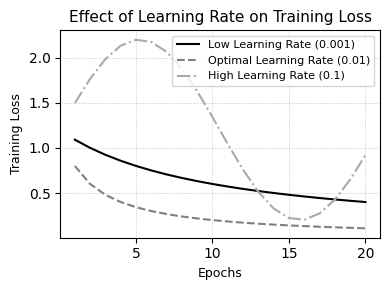

#### 2.0.2 Regularization: Overfitting and Underfitting

Regularization helps a model generalize better to unseen data by discouraging overly complex solutions. Think of it as a penalty for “memorizing the training data” rather than learning useful patterns.

By modifying the loss function to include a penalty term that discourages large weights. The two most common types are **L1** and **L2** regularization:

1. **L1 Regularization (Lasso):**  
   Adds the absolute value of weights as a penalty:

   $$
   L_{\text{new}} = L_{\text{original}} + \lambda \sum |w_i|
   $$

   - Encourages sparsity by driving some weights to exactly zero.  
   - Useful for feature selection.

2. **L2 Regularization (Ridge):**  
   Adds the square of weights as a penalty:

   $$
   L_{\text{new}} = L_{\text{original}} + \lambda \sum w_i^2
   $$

   - Shrinks weights toward zero, making the model more robust without eliminating features.

Here:  
- $L_{\text{original}}$: The original loss function.  
- $\lambda$: The regularization strength (hyperparameter).  
- $w_i$: Individual weights of the model.

By tuning the regularization parameter $\lambda$, you can control the trade-off between fitting the training data well and keeping the model simple enough to generalize effectively.

#### **Range of Values and Trade-offs**
| Regularization Strength (\(\lambda\)) | Effect                             | Pros                             | Cons                             |
|---------------------------------------|------------------------------------|----------------------------------|----------------------------------|
| **Low $(\lambda = 0)$**             | No regularization applied          | Fits the training data perfectly | Risks overfitting                |
| **Moderate $(\lambda = 0.01)$**     | Slight weight shrinkage            | Balances training and validation performance | Requires tuning                  |
| **High $(\lambda = 0.1)$**          | Strong weight shrinkage            | Prevents overfitting             | Risks underfitting (oversimplifying the model) |



#### **Visualizing Its Effect**
Imagine a simple regression problem with data points scattered around a trend line. Without regularization, the model might overfit, curving to pass through every point. With increasing regularization:
- **No Regularization $(\lambda = 0)$**: The model fits all points, capturing noise.  
- **Moderate Regularization $(\lambda = 0.01)$**: The model smooths out, fitting the general trend.  
- **High Regularization $(\lambda = 0.1)$**: The model oversimplifies, failing to capture important features.


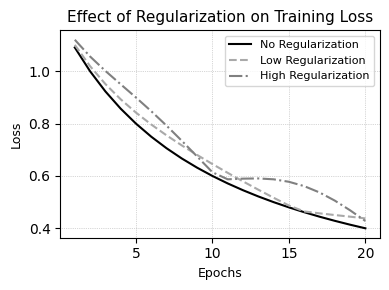

#### 2.0.3 Activation Functions (Non-Linearities)

Activation functions introduce non-linearity into neural networks, allowing them to learn complex patterns in data.

Each neuron in a neural network computes a weighted  sum of its inputs:

$$
z = w \cdot x + b
$$

The activation function $f(z)$ then determines the output:

$$
a = f(z)
$$

Different activation functions have unique properties that affect how the network learns and processes information. Here are some commonly used activation functions:

| **Function**  | **Formula**                          | **Pros**                                | **Cons**                               |
|---------------|--------------------------------------|-----------------------------------------|----------------------------------------|
| **ReLU**      | $f(z) = \max(0, z)$               | Efficient, avoids vanishing gradients   | Can lead to "dead neurons"             |
| **Sigmoid**   | $f(z) = \frac{1}{1 + e^{-z}}$      | Smooth, interpretable output            | Vanishing gradients, slow convergence  |
| **Tanh**      | $f(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$ | Scales output between \(-1\) and \(1\)  | Still prone to vanishing gradients     |
| **Softmax**   | $f(z)_i = \frac{e^{z_i}}{\sum_j e^{z_j}}$ | Converts scores into probabilities      | Only used in the output layer          |

#### **Why Activation Functions Matter**
1. **ReLU (Rectified Linear Unit):**  
   - Most commonly used activation function in hidden layers.  
   - Efficient to compute and avoids the vanishing gradient problem seen with sigmoid and tanh.  
   - **Challenge:** Can produce "dead neurons" when $z \leq 0$, as the gradient becomes zero.

2. **Sigmoid and Tanh:**  
   - Useful for tasks requiring bounded outputs (e.g., probabilities for sigmoid).  
   - **Challenge:** Gradients diminish as $z$ moves toward extreme values, slowing learning.

3. **Softmax:**  
   - Converts raw scores into probabilities for multi-class classification problems.  
   - Typically used in the output layer for classification tasks.


#### **Choosing the Right Activation Function**

- For hidden layers, ReLU is often the default choice due to its efficiency and performance.
- For output layers, the choice depends on the task: use sigmoid for binary classification, softmax for multi-class classification, and linear activation for regression tasks.
- Experimentation with different activation functions can lead to improved model performance depending on the specific problem and dataset.

The plot bellow illustrates how some of the activation functions behave given input $z$ and output $f(z)$:

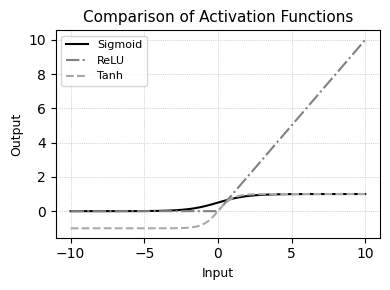

#### 2.0.4 **Number of Epochs: How Long Should the Model Learn?**

The number of epochs determines how many times the entire training dataset is passed through the model during training. It’s like practicing a skill, more practice can lead to mastery, but overdoing it might cause burnout or overfitting.

#### **What Happens During an Epoch?**  
During one epoch, the model:
1. Processes the entire training dataset, divided into batches.  
2. Updates its weights using gradient descent for each batch.

The number of epochs determines how many times this process is repeated. A higher number of epochs allows the model to learn more, but it increases the risk of overfitting (performing well on the training data but poorly on unseen data).
#### **Range of Values and Trade-offs**
| **Epochs**       | **Effect**                            | **Pros**                          | **Cons**                          |
|-------------------|---------------------------------------|------------------------------------|-----------------------------------|
| **Low (e.g., 5)** | Limited learning; underfitting risk   | Faster training                   | May not capture data patterns     |
| **Optimal (e.g., 20-50)** | Balanced learning; generalizes well | Good trade-off between speed & accuracy | Requires careful tuning           |
| **High (e.g., 100+)** | Risk of overfitting                | Maximizes accuracy on training data | May lead to poor generalization   |


#### **Visualizing Its Effect**  
Imagine you train a model for different numbers of epochs:
- **Too Few Epochs:** The model underfits, as it hasn’t learned enough patterns from the data. Validation loss decreases slightly or stays high.  
- **Optimal Number of Epochs:** Training loss decreases steadily, and validation loss stabilizes, indicating good generalization.  
- **Too Many Epochs:** Validation loss increases after a certain point, while training loss keeps decreasing, showing overfitting.


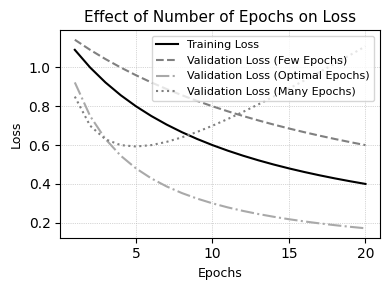

#### 2.0.5 **Optimizer: The Strategy for Learning**  

An optimizer determines how the model updates its weights during training to minimize the loss function. It defines the algorithm that drives gradient descent, making it one of the most crucial choices for training neural networks effectively.

#### **Mathematical Context**  
The optimizer updates weights based on the gradient of the loss function. The general weight update rule is:

$$
w^{t+1} = w^t - \eta \cdot \nabla L(w^t)
$$

Where:
- $w^t$: Weights at step $t$.  
- $\eta$: Learning rate.  
- $\nabla L(w^t)$: Gradient of the loss function at $w^t$.

Different optimizers modify this basic formula to improve performance. For example:

1. **Stochastic Gradient Descent (SGD):**  
   $$
   w^{t+1} = w^t - \eta \cdot \nabla L(w^t)
   $$
   - Simple and efficient but may converge slowly.

2. **Adam (Adaptive Moment Estimation):**  
   $$
   m_t = \beta_1 m_{t-1} + (1 - \beta_1) \nabla L(w^t)
   $$
   $$
   v_t = \beta_2 v_{t-1} + (1 - \beta_2) (\nabla L(w^t))^2
   $$
   $$
   \hat{m}_t = \frac{m_t}{1 - \beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t}
   $$
   $$
   w^{t+1} = w^t - \eta \cdot \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
   $$
   - Combines momentum and adaptive learning rates for faster, more stable convergence.



#### **Range of Choices and Trade-offs**
| Optimizer  | Behavior                                    | Pros                              | Cons                              |
|------------|--------------------------------------------|-----------------------------------|-----------------------------------|
| **SGD**    | Simple gradient-based updates              | Easy to implement, computationally efficient | May converge slowly, sensitive to learning rate. |
| **Momentum** | Adds momentum to SGD to smooth updates    | Reduces oscillations, accelerates convergence | Requires tuning of momentum parameter. |
| **Adam**   | Combines momentum and adaptive learning rates | Fast convergence, good default for many tasks | May generalize poorly if not tuned. |
| **RMSprop** | Scales learning rate based on gradient magnitude | Handles noisy updates well       | May not perform well on all tasks. |


#### **Visualizing Its Effect**  
Imagine optimizing a loss function shaped like a bowl. Each optimizer takes a different path to reach the bottom:
- **SGD:** Takes steady, small steps, which may oscillate near the solution.  
- **Momentum:** Smooths oscillations by combining past gradients with the current one.  
- **Adam:** Adjusts step sizes adaptively, accelerating learning in some regions while slowing down in others.



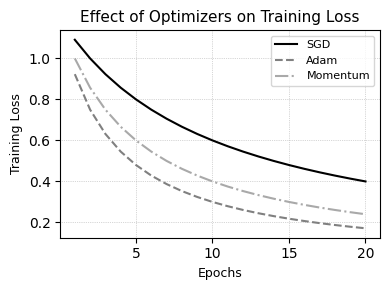

#### 2.0.6 **Architecture - Number of Hidden Layers and Neurons per Hidden Layer**

The **number of hidden layers** determines the **depth** of a neural network, while the **number of neurons per hidden layer** defines its **width**. Together, they shape the architecture and control the model’s ability to learn patterns and generalize. These two hyperparameters must be balanced to align with the task requirements and the chosen architecture.

#### **Why Do They Matter?**
1. **Depth:**  
   - More layers increase the model's ability to capture hierarchical features but can lead to overfitting or higher computational costs.  
   - Fewer layers result in simpler models that might underfit complex data.  
   - Depth is essential for defining architectural shapes like hourglass, pyramid, and cone.

2. **Width:**  
   - More neurons per layer increase the model’s capacity to represent features.  
   - Fewer neurons result in a simpler model but may miss fine-grained patterns.  
   - Width affects architectural shapes like the tapering of a pyramid or the bottleneck of an hourglass.



#### **How They Relate to Shapes**

| **Common Shapes**            | **Depth (Layers)** | **Example Width (Neurons per Layer)**          | **Common Use Cases**                                                                                     | **Examples**                                                                                     |
|-----------------------|--------------------|-----------------------------------------|----------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------|
| **Hourglass**         | 3-5+                | 128 → 64 → 32 → 64 → 128               | Symmetric tasks, encoder-decoder pipelines, feature refinement                                           | U-Net, VAEs, GAN discriminators, DensePose                                                     |
| **Pyramid**           | 4-8+                | 256 → 128 → 64 → 32                    | Hierarchical feature extraction, dimensionality reduction                                                | CNNs, ResNet (early layers), Vision Transformers (preprocessing)                               |
| **Inverted Pyramid**  | 4-8+                | 32 → 64 → 128 → 256                    | Expanding representations, synthesis, reconstruction tasks                                              | GAN generators, VAE decoders, PixelCNNs                                                       |
| **Cone**              | 4-8+                | 256 → 192 → 128 → 96 → 64              | Progressive generative refinement, smooth transitions                                                   | GAN generators, Progressive GANs                                                               |
| **Cylinder**          | 2-6+                | 128 → 128 → 128 → 128                  | Sequential or temporal patterns, simple-to-moderate complexity                                          | RNNs, LSTMs, GRUs, Transformer encoders                                                       |



### **2.1 How Backpropagation Works**

Backpropagation is the process that allows a neural network to learn by calculating and propagating gradients through the network. Each hyperparameter listed below influences different parts of this process, shaping the efficiency and outcome of training.


#### **1. Forward Propagation**
- **What Happens:**  
  - The input data ($x \in \mathbb{R}^n$) is passed through the network layer by layer to produce a prediction ($\hat{y}$).
  - Each layer computes:  
    $$
    z_i = W_i \cdot a_{i-1} + b_i, \quad a_i = f_i(z_i)
    $$  
    - $z_i$: Weighted sum of inputs at layer $i$.  
    - $a_i$: Output after applying the activation function $f_i(z_i)$.  
    
- **Hyperparameters Involved:**  
  - Activation Functions
  - Number of Hidden Layers and Neurons per Hidden Layer

#### **2. Loss Calculation**
- **What Happens:**  
  - The loss function quantifies the error between the predicted output ($\hat{y}$) and the true target ($y$):  
    $$
    L = \text{Loss}(y, \hat{y})
    $$  
  - Examples:
    - **Cross-Entropy Loss** (classification tasks):  
      $$
      L = -\sum_{i=1}^k y_i \log(\hat{y}_i)
      $$  
    - **Mean Squared Error (MSE)** (regression tasks):  
      $$
      L = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2
      $$  

- **Hyperparameters Involved:**  
  - Regularization


#### **3. Gradient Computation**
- **What Happens:**  
  - Gradients of the loss function are computed with respect to each parameter (weights $W_i$ and biases $b_i$) by applying the chain rule:
$$
\frac{\partial L}{\partial z_i} = \frac{\partial L}{\partial a_i} \cdot f_i'(z_i)
$$
  - For hidden layers:
$$
\frac{\partial L}{\partial z_i} = \left(\frac{\partial L}{\partial z_{i+1}} \cdot W_{i+1}^\top\right) \cdot f_i'(z_i)
$$  

- **Hyperparameters Involved:**  
  - Batch Size


#### **4. Weight and Bias Updates**
- **What Happens:** Using the gradients, weights and biases are updated to reduce the loss:

$$
W_i^{t+1} = W_i^t - \eta \cdot \frac{\partial L}{\partial W_i}, \quad b_i^{t+1} = b_i^t - \eta \cdot \frac{\partial L}{\partial b_i}
$$

- **where** $\eta$: Learning rate that controls the size of the updates.
- **Hyperparameters Involved:**  
  - Learning Rate
  - Optimizer


#### **5. Iterative Process**
- **What Happens:**  
  - Steps 1–4 are repeated for each batch across all epochs.  
  - The network gradually converges as backpropagation iteratively adjusts parameters.

- **Hyperparameters Involved:**  
  - Number of Epochs

## Part 3: Your First MLP on MNIST

In [ ]:
# install packages
!pip install matplotlib tqdm --quiet
!pip install torch torchvision torchaudio --quiet

In [ ]:
# Environment check (optional)
import sys
print("Python:", sys.version)
try:
    import torch
    print("PyTorch:", torch.__version__)
    print("CUDA available:", torch.cuda.is_available())
except Exception as e:
    print("PyTorch not found or misconfigured:", e)

In [ ]:
# Imports
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm.auto import tqdm

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", DEVICE)

In [ ]:
# Data: MNIST
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

root = os.path.join(os.getcwd(), "data")
train_ds = datasets.MNIST(root=root, train=True, download=True, transform=transform)
val_ds   = datasets.MNIST(root=root, train=False, download=True, transform=transform)

print("Train samples:", len(train_ds))
print("Val samples:", len(val_ds))

In [ ]:
# Data Loaders
BATCH_SIZE = 64
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
# Test DataLoader
for images, labels in train_loader:
    print(f"Batch images shape: {images.shape}")
    print(f"Batch labels shape: {labels.shape}")
    break

In [ ]:
# Visualize a sample
import matplotlib.pyplot as plt
sample_img, sample_label = train_ds[0]
plt.imshow(sample_img.squeeze(), cmap='gray')
plt.title(f"Label: {sample_label}")
plt.show()

### Model Building

In [ ]:
from torchsummary import summary
INPUT_SIZE = 28 * 28  # MNIST images are 28x28 pixels
HIDDEN_SIZE = 128
OUTPUT_SIZE = 10  # 10 classes for digits 0-9
simple_model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(INPUT_SIZE, HIDDEN_SIZE),
    nn.ReLU(),
    nn.Linear(HIDDEN_SIZE, OUTPUT_SIZE)
).to(DEVICE)

summary(simple_model, (1, 28, 28))


### Architecture 1: Cylindrical  Architecture

In [ ]:
cylindrical_model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(INPUT_SIZE, HIDDEN_SIZE),
    nn.ReLU(),
    nn.Linear(HIDDEN_SIZE, HIDDEN_SIZE),
    nn.ReLU(),
    nn.Linear(HIDDEN_SIZE, OUTPUT_SIZE)
).to(DEVICE)

summary(cylindrical_model, (1, 28, 28))

### Architecture 2: Pyramid Architecture

In [ ]:
pyramid_model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(INPUT_SIZE, HIDDEN_SIZE),
    nn.ReLU(),
    nn.Linear(HIDDEN_SIZE, HIDDEN_SIZE // 2),
    nn.ReLU(),
    nn.Linear(HIDDEN_SIZE // 2, OUTPUT_SIZE)
).to(DEVICE)
summary(pyramid_model, (1, 28, 28))

In [ ]:
# Training utilities
def train_one_epoch(model, loader, optimizer):
    model.train()
    total, correct, total_loss = 0, 0, 0.0
    for x, y in tqdm(loader, leave=False):
        x, y = x.to(DEVICE), y.to(DEVICE)
        logits = model(x)
        loss = F.cross_entropy(logits, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * x.size(0)
        preds = logits.argmax(dim=1)
        correct += (preds == y).sum().item()
        total += x.size(0)
    return total_loss / total, correct / total


def evaluate(model, loader):
    model.eval()
    total, correct, total_loss = 0, 0, 0.0
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(DEVICE), y.to(DEVICE)
            logits = model(x)
            loss = F.cross_entropy(logits, y)
            total_loss += loss.item() * x.size(0)
            preds = logits.argmax(dim=1)
            correct += (preds == y).sum().item()
            total += x.size(0)
    return total_loss / total, correct / total


### Model Training and Evaluation

In [ ]:
# Train default config
batch_size = 64
lr = 1e-3
epochs = 3

optimizer = torch.optim.Adam(simple_model.parameters(), lr=lr)

# Simple MLP
for ep in range(1, epochs+1):
    t_loss, t_acc = train_one_epoch(simple_model, train_loader, optimizer)
    v_loss, v_acc = evaluate(simple_model, val_loader)
    print(f"Epoch {ep}: train_loss={t_loss:.4f} train_acc={t_acc:.4f} | val_loss={v_loss:.4f} val_acc={v_acc:.4f}")

In [ ]:
# Cylindrical MLP
cylindrical_optimizer = torch.optim.Adam(cylindrical_model.parameters(), lr=lr)
for ep in range(1, epochs+1):
    t_loss, t_acc = train_one_epoch(cylindrical_model, train_loader, cylindrical_optimizer)
    v_loss, v_acc = evaluate(cylindrical_model, val_loader)
    print(f"Epoch {ep}: train_loss={t_loss:.4f} train_acc={t_acc:.4f} | val_loss={v_loss:.4f} val_acc={v_acc:.4f}")

In [ ]:
# Pyramid MLP
pyramid_optimizer = torch.optim.Adam(pyramid_model.parameters(), lr=lr)
for ep in range(1, epochs+1):
    t_loss, t_acc = train_one_epoch(pyramid_model, train_loader, pyramid_optimizer)
    v_loss, v_acc = evaluate(pyramid_model, val_loader)
    print(f"Epoch {ep}: train_loss={t_loss:.4f} train_acc={t_acc:.4f} | val_loss={v_loss:.4f} val_acc={v_acc:.4f}")

## Part 4: Running experiments

### **1. [Simple, Sample Ablation Sheet](https://docs.google.com/spreadsheets/d/1xJkX_1utAIbdQ72jESSDZAKeHGApidalCKesgNzjz-0/edit?usp=sharing)**


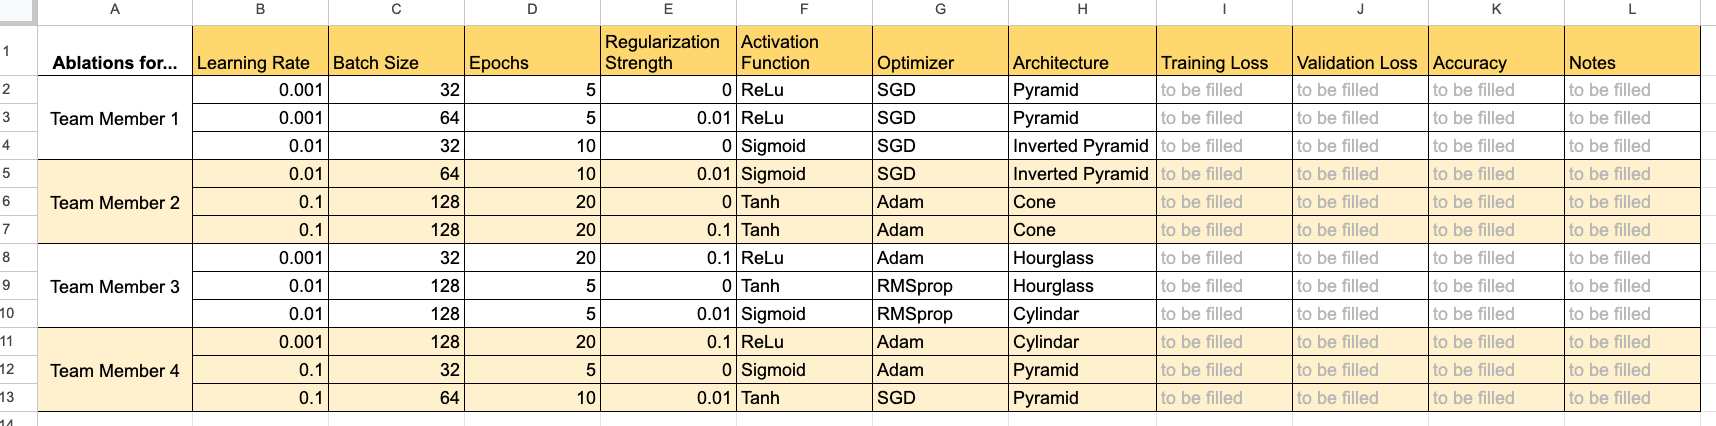

### **2. Group Activity**

1. We will make a breakout room of 4-5 people.
2. Assign each person specific parameters to test (e.g., learning rate, batch size).
  - You can use the sample ablation sheet we've linked above, just assign each group member to a set of ablations.
3. Each person records results in the ablation sheet.
4. Compare findings and discuss patterns observed.

### **3. Reflect on the Results**


After everyone has done their ablations, discuss:
- What changes improved performance the most?
- Were there unexpected results?


# **Bonus: Improving Neural Networks & General Reading**

### Optimizers

This section will discuss a few optimizers you may find useful going forward. Above we had used Adam, an extremely well explored optimizer which has many subsequent optimizers based on it. Among them for future homework you may find that the AdamW optimizer, or AdamP may be particularly interesting.


* AdamW's integrates weight decay, which makes it particularly suitable for complex models like CNNs, where it effectively helps in preventing overfitting, a common issue in such architectures. Weight decay works by gradually reducing the weights of the neurons in the network, encouraging simpler models and thus reducing overfitting.


* As for AdamP, it optimizes the model by adjusting the gradients in a way that is more sensitive to the structure of the data, potentially leading to more efficient and stable training.


* There is also the very classic approach of Stochastic Gradient Descent (SGD), which may prove to be a better optimizer in many cases, such as scenarios where simplicity and transparency in the optimization process are crucial. Unlike more complex optimizers, SGD relies on a straightforward update rule, which can be more interpretable and easier to debug. This makes it particularly effective in situations where the data is not excessively complex or when the model architecture is relatively simple. Moreover, SGD can sometimes escape local minima more effectively than algorithms like Adam, leading to better generalization in certain types of problems.


## Checkpoint 1

Try training your model using AdamW, AdamP, and SGD optimizers. Compare their performance on your validation set and note any differences in convergence speed and final accuracy.

In [ ]:
# Adam: The classic Adam Optimizer
optimizer_adam   = torch.optim.Adam(simple_model.parameters(), lr=0.001) # https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam

# AdamW: Notice when reading the pytorch documentation that AdamW allows a weight decay variable. This often improves performance by applying a form of regularization
optimizer_adamw   = torch.optim.AdamW(simple_model.parameters(), lr=0.001, weight_decay=0.01) # https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.AdamW

!pip3 install adamp

from adamp import AdamP --quiet

# AdamP: AdamP is a bit more fiddly as it is not natively included in torch and you must import it like above, or write it yourself

optimizer_adamp   = AdamP(simple_model.parameters(), lr=0.001) # Link: https://clovaai.github.io/AdamP/




# SGD: The classic SGD optimizer

optimizer_sgd   = torch.optim.SGD(simple_model.parameters(), lr=0.01)  # Link: https://pytorch.org/docs/stable/generated/torch.optim.SGD.html

"""
PAPERS:

Adam:   https://arxiv.org/abs/1412.6980   "Adam: A Method for Stochastic Optimization"
AdamW:  https://arxiv.org/abs/1711.05101  "AdamW: Decoupled Weight Decay Regularization"
AdamP:  https://arxiv.org/abs/2006.08217  "AdamP: Slowing Down the Slowdown for Momentum Optimizers on Scale-invariant Weights"

SGD is well explored enough that this paper is included to discuss momentum. Read if you are interested, this topic may appear later.
SGD:    https://www.cs.toronto.edu/%7Ehinton/absps/momentum.pdf
"""

# TODO: Traing Loop for various optimizers
# Hint you need to reset the model parameters before training with a new optimizer by using the line below
# simple_model.apply(lambda m: m.reset_parameters() if hasattr(m, 'reset_parameters') else None)

### Dropout

Dropout is a regularization technique used to prevent overfitting in neural networks. It works by randomly deactivating a subset of neurons during training, forcing the network to learn more robust features that are not reliant on any specific set of neurons, thus enhancing the model's generalization ability. Dropout is an extremely useful tool that you can find yourself using very often and will be very helpful in future assignments. You may even find it useful to tune dropout between epochs sometimes.


## Checkpoint 2

Incorporate dropout layers into your neural network architecture. Experiment with different dropout rates (e.g., 0.2, 0.5) and observe their effects on training and validation performance.

In [ ]:
"""
Please either create a network or fill in from earlier but with a dropout layer. Dropout is another tool that will show up
continually as you study deep learning. It is prolific and often takes other forms such as Drop Blocks and Drop Paths. The general concept for
what it does and the intuition is generally consistent however. Below implement the network using dropout. Documentation is provided below.

Dropout:                https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html#torch.nn.Dropout
"""

# Define your network (Feel free to create your networks)
model_1 = torch.nn.Sequential(
  nn.Flatten(),

  nn.Linear(INPUT_SIZE, HIDDEN_SIZE), # Declare your first linear layer. What should the input and output size be?

  nn.Dropout(0.2), # Insert your dropout layer, feel free to change dropout value to see it's effect

  nn.ReLU(), # Declare your activation function


  # Add any additional layers here if you would like before the final layer


  nn.Linear(HIDDEN_SIZE, OUTPUT_SIZE)  # Declare your final linear layer that outputs the OUT_SIZE
)

# Move the model to device. This step is required before training
model_1 = model_1.to(DEVICE)

summary(model_1, (1, 28, 28))

# training loop
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.001)  # You can change the learning rate if you wish

# TODO: Add the training loop below

### Batch Normalization

Batch normalization (BatchNorm) is a technique used to improve the speed, performance, and stability of neural networks. It works by normalizing the inputs of each layer, ensuring that they have a mean of zero and a standard deviation of one, which helps to mitigate issues related to poor initialization and helps in faster convergence.

BatchNorm though seeming to be quite a minor detail offers a significant impact on your network on more complex problems and can prove invaluable as an initial first step to improve your network. Below will be an example using code from before. Fill in with your neural network but this time, include batchnorm. This structure will be very helpful and repeat itself on future homeworks.

## Checkpoint 3

Incorporate batch normalization layers into your neural network architecture. Observe how this affects training speed and model performance compared to your previous implementations without batch normalization.

In [ ]:
"""
Please either create a network or fill in from earlier but with the correct values for batchnorm. Note that
batchnorm needs to take in the size of the current prior layer to work. Usually this is done either
before an activation or after and for each layer. Documentation is provided below.

Batchnorm:              https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html#torch.nn.BatchNorm1d

"""

# Define your network (Feel free to create your networks)
model_1 = torch.nn.Sequential(
    nn.Flatten(),

  nn.Linear(INPUT_SIZE, HIDDEN_SIZE), # Declare your first linear layer. What should the input and output size be?

  nn.BatchNorm1d(HIDDEN_SIZE), # Apply batch normalization

  nn.ReLU(), # Declare your activation function

  # Add any additional layers here if you would like before the final layer


  nn.Linear(HIDDEN_SIZE, OUTPUT_SIZE)  # Declare your final linear layer that outputs the OUT_SIZE
)

# Move the model to device. This step is required before training
model_1 = model_1.to(DEVICE)

summary(model_1, (1, 28, 28))

# training loop
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.001)  # You can change the learning rate if you wish

# TODO: Add the training loop below

### Schedulers

Schedulers are tools used in training neural networks to adjust the learning rate during training, which can lead to more effective and efficient optimization. There are many viable options in this regard, including writing your own, but you may find ReduceLROnPlateau or CosineAnnealingLR especially useful.

* ReduceLROnPlateau works by monitoring a specified metric (like validation loss) and reducing the learning rate when this metric stops improving. Essentially, it implements a form of learning rate decay; if the model's performance plateaus, the learning rate decreases, which can help to escape local minima and continue learning.

* CosineAnnealingLR works by adjusting the learning rate following a cosine curve. This means the learning rate starts high, decreases to a minimum, and then increases again. This approach can help in navigating the loss landscape more effectively by allowing the model to explore more during the periods of higher learning rates and refine its understanding of the data during the periods of lower learning rates.

## Checkpoint 4

Implement a learning rate scheduler in your training loop. Experiment with both ReduceLROnPlateau and CosineAnnealingLR, and compare their effects on training dynamics and final model performance.```python

In [ ]:
# All optimizers built into Torch: https://pytorch.org/docs/stable/optim.html

# ReduceLRonPlateau
scheduler_RL = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min') # https://pytorch.org/docs/stable/generated/torch.optim.lr_scheduler.ReduceLROnPlateau.html#torch.optim.lr_scheduler.ReduceLROnPlateau

# CosineAnnealingLR
scheduler_CA = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10) # https://pytorch.org/docs/stable/generated/torch.optim.lr_scheduler.CosineAnnealingLR.html#torch.optim.lr_scheduler.CosineAnnealingLR

"""
PAPERS:
CosineAnnealingLR: https://arxiv.org/abs/1608.03983
"""
SCHEDULERS = {
    "ReduceLROnPlateau": scheduler_RL,
    "CosineAnnealingLR": scheduler_CA
}

# training loop with schedulers
# Hint you need to reset the model parameters before training with a new optimizer by using:
# simple_model.apply(lambda m: m.reset_parameters() if hasattr(m, 'reset_parameters') else None)

# TODO: Add the training loop below


#### Learning Rate Warmup

Learning Rate Warmup is a technique used to gradually increase the learning rate from a small value to the target learning rate over a predefined number of iterations or epochs at the beginning of training. This approach helps to stabilize the training process, especially in deep neural networks, by preventing large weight updates that can occur with high initial learning rates. By starting with a lower learning rate, the model can make more controlled adjustments to its weights, leading to better convergence and improved overall performance.

#### Example of Learning Rate Warmup with PyTorch
```python
import torch
from torch.optim.lr_scheduler import LambdaLR
# Define a simple model
model = torch.nn.Linear(10, 1)
# Define an optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
# Define a warmup function
def warmup_lambda(epoch):
    if epoch < 5:
        return epoch / 5
    return 1
# Create a learning rate scheduler with warmup
scheduler = LambdaLR(optimizer, lr_lambda=warmup_lambda)
# Training loop
for epoch in range(20):
    # Training code here
    optimizer.step()
    scheduler.step()
```